In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anugerahfr","key":"7fbe08c4ca8907ffc65582d46f6b6c1a"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d rashmiranu/banking-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification
License(s): unknown
100% 409k/409k [00:00<00:00, 1.07MB/s]
100% 409k/409k [00:00<00:00, 1.07MB/s]


In [5]:
!unzip banking-dataset-classification.zip -d banking-dataset-classification
!ls banking-dataset-classification

Archive:  banking-dataset-classification.zip
  inflating: banking-dataset-classification/new_test.csv  
  inflating: banking-dataset-classification/new_train.csv  
new_test.csv  new_train.csv


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate

In [7]:
df = pd.read_csv('/content/banking-dataset-classification/new_test.csv')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [10]:
df.drop(columns=['loan','contact','default','housing'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   month        8238 non-null   int64
 5   day_of_week  8238 non-null   int64
 6   duration     8238 non-null   int64
 7   campaign     8238 non-null   int64
 8   poutcome     8238 non-null   int64
dtypes: int64(9)
memory usage: 579.4 KB


In [16]:
X = df.drop("poutcome",axis=1)
y = pd.get_dummies(df.poutcome)

In [18]:
X

,age,job,marital,education,month,day_of_week,duration,campaign
0,32,4,0,6,3,3,131,5
1,37,10,3,6,4,3,100,1
2,55,5,0,5,3,2,131,2
3,44,2,1,0,4,3,48,2
4,28,0,2,3,5,0,144,2
...,...,...,...,...,...,...,...,...
8233,48,4,1,2,6,3,554,1
8234,30,7,2,3,6,0,159,1
8235,33,7,1,3,4,1,472,1
8236,44,1,1,1,6,1,554,5


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(8238, 8)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

In [23]:
X_train.shape

(7414, 8)

In [24]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape= X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 267 (1.04 KB)
Trainable params: 267 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="rmsprop")
early_stop = keras.callbacks.EarlyStopping(patience=20)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,callbacks=early_stop)

Epoch 1/15
232/232 [==============================] - 1s 3ms/step - loss: 3.0296 - accuracy: 0.7269 - val_loss: 0.5472 - val_accuracy: 0.8617
Epoch 2/15
232/232 [==============================] - 1s 3ms/step - loss: 0.4931 - accuracy: 0.8669 - val_loss: 0.4839 - val_accuracy: 0.8617
Epoch 3/15
232/232 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.8661 - val_loss: 0.4813 - val_accuracy: 0.8617
Epoch 4/15
232/232 [==============================] - 1s 3ms/step - loss: 0.4880 - accuracy: 0.8658 - val_loss: 0.5141 - val_accuracy: 0.8617
Epoch 5/15
232/232 [==============================] - 1s 4ms/step - loss: 0.4815 - accuracy: 0.8682 - val_loss: 0.5423 - val_accuracy: 0.8556
Epoch 6/15
232/232 [==============================] - 1s 3ms/step - loss: 0.4802 - accuracy: 0.8680 - val_loss: 0.5050 - val_accuracy: 0.8617
Epoch 7/15
232/232 [==============================] - 1s 3ms/step - loss: 0.4789 - accuracy: 0.8682 - val_loss: 0.5003 - val_accuracy: 0.8617
Epoch 

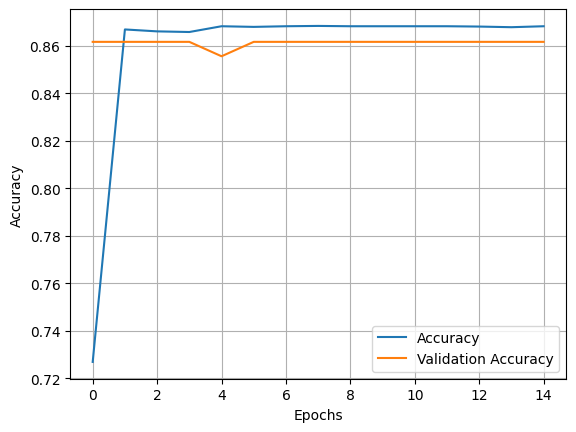

In [28]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

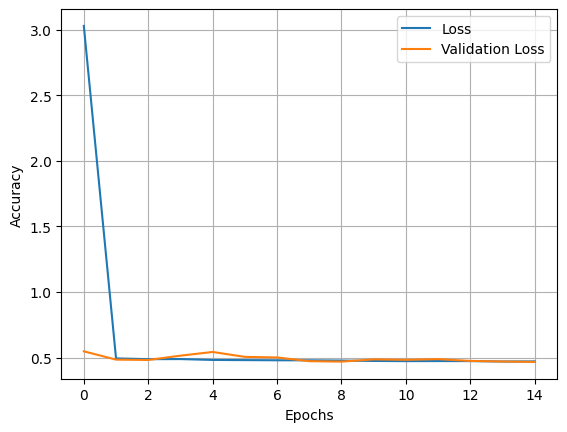

In [29]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [30]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

26/26 [==============================] - 0s 1ms/step


In [31]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8616504854368932


In [32]:
model.save('./bank.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model = tf.keras.models.load_model('./bank.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./bank.tflite", "wb").write(tflite_model)

3164